In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import pywt.data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Binance_EOSUSDT_d.csv")
high=pd.DataFrame(df['high'],range(0,100))
df

,unix,date,symbol,open,high,low,close,Volume EOS,Volume USDT,tradecount
0,1635724800000,2021-11-01 00:00:00,EOS/USDT,4.6370,4.7200,4.6010,4.6860,981157.20,4.581967e+06,18006
1,1635638400000,2021-10-31 00:00:00,EOS/USDT,4.4800,4.7730,4.4430,4.6370,23251890.90,1.065591e+08,274574
2,1635552000000,2021-10-30 00:00:00,EOS/USDT,4.5020,4.5240,4.3480,4.4800,12769295.90,5.678941e+07,114377
3,1635465600000,2021-10-29 00:00:00,EOS/USDT,4.4010,4.5420,4.3740,4.5020,13111625.60,5.847186e+07,118427
4,1635379200000,2021-10-28 00:00:00,EOS/USDT,4.1510,4.4950,4.1330,4.4010,24985864.10,1.084351e+08,249012
...,...,...,...,...,...,...,...,...,...,...
1249,1527811200000,2018-06-01 00:00:00,EOS/USDT,12.2351,12.3889,11.8354,12.2048,5946136.88,7.216073e+07,53090
1250,1527724800000,2018-05-31 00:00:00,EOS/USDT,11.8712,12.7400,11.8116,12.2353,6540020.80,8.045451e+07,55055
1251,1527638400000,2018-05-30 00:00:00,EOS/USDT,12.1113,12.8200,11.6206,11.8968,6514864.18,7.855943e+07,52521
1252,1527552000000,2018-05-29 00:00:00,EOS/USDT,11.4853,12.4650,10.7000,12.1112,6709192.34,7.816397e+07,67086


In [3]:
X = np.array(high).reshape(100,)
Z = np.arange(0, 100)

تبدیل فوریه

In [5]:

def freq_sampling_filter(x, n_components):
  n = len(x)

  # compute the fft
  fft = np.fft.fft(x, n)

  # compute power spectrum density
  # squared magnitud of each fft coefficient
  PSD = fft * np.conj(fft) / n

  # keep frequencies with large contributions
  _mask = PSD > n_components
  _coff = np.fft.fftshift(np.real(np.fft.ifft(_mask)))
  return _coff

coff = freq_sampling_filter(X, X)


In [6]:
cleaned = signal.filtfilt(coff, 1, X, padlen=len(X)-1, padtype='constant')

<ipython-input-7-a560f865e891>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Z,X,color='c',Linewidth=1.5,label='Noisy')
<ipython-input-7-a560f865e891>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Z,cleaned,color='r',Linewidth=1.5,label='cleaned')


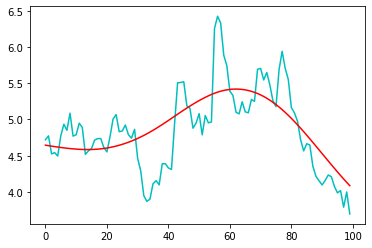

In [7]:
plt.plot(Z,X,color='c',Linewidth=1.5,label='Noisy')
plt.plot(Z,cleaned,color='r',Linewidth=1.5,label='cleaned')
plt.show()

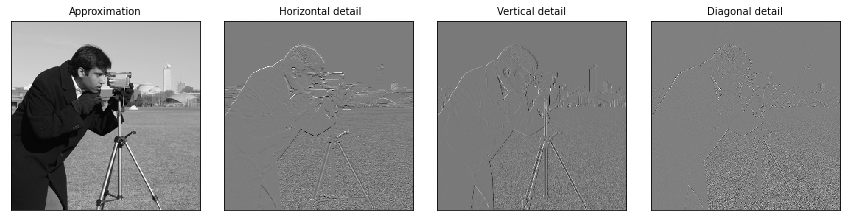

In [3]:

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

PCA

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
features= ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


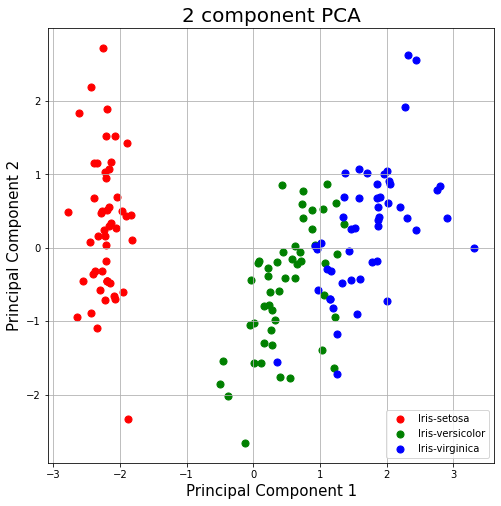

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()